<a href="https://colab.research.google.com/github/weladmani/Stroke-Prediction-on-Kaggle-dataset/blob/main/Supervised%20Learning%20Stroke%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maman21 - course number 20595

# Question 1: problem statement and data preprocessing
**A**. In this notebook, I attempted to visulize some key indicators that lead to heart strokes. Here data is sampled from a wide range of age groups, gender, habits and health related issues. Most of the visualizations are self expilantory and try to stick to simple visualization but effiective method to convey most of the information.

**Questions and Assumptions**
1. Does age has impact on strokes? and How is this parameter distributed?
2. Does body mass index and glucose levels in a person, propel a heart stroke?
3. Assumption: Smoking can induce Stroke, is it true?
4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?
5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?
6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true?
7. Relationship between continous and categorical data
8. Feature importance and Feature Selection for accurate predictions

////////////////////////////////////////////////////////////

**B**. In the current dataset, there are 11 features and one binary target. A brief information about the features are given below

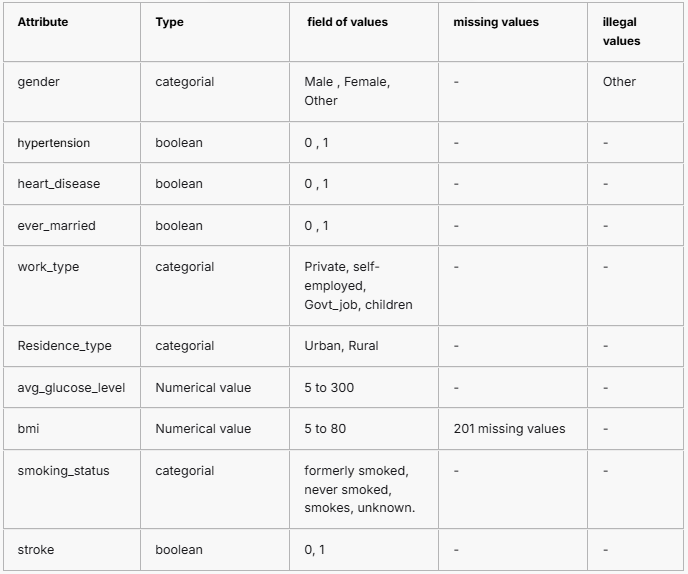

1. id: Identification number of the individual.
2. gender: Gender of the individual.
3. hypertension: Health related parameter, does person have hypertension.
4. heart_disease: Health related parameter, does person have heart disease.
5. ever_married: Personal information, is person married on not?
6. work_type: Nature of work place.
7. Residence_type: Residence type of the individual.
8. avg_glucose_level: average glucose level in blood for the individual.
9. bmi: body mass index of the individual.
10. smoking_status: Habitual information. Current smoking status of individual.
11. stroke: Our target, is person suffered heart attack?

//////////////////////////////////////////////////////////////

**C**. KDD steps for the given problem

1. Data Selection: Selected relevant features from the dataset such as: age, gender, hypertension, heart_disease, work_type, avg_glucose_level, bmi, smoking_status, and the target variable stroke.


In [ ]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE

!pip install -U scikit-learn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, 'healthcare-dataset-stroke-data.csv'))

# Drop irrelevant columns
df = df.drop(columns=["id"])

# Show the first few rows
df.head(3)

Path to dataset files: /kaggle/input/stroke-prediction-dataset


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


step 2: Handle missing Values of bmi, I will fill the missing bmi values with the mean

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing bmi values with the mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Remove Rare or Noisy Data
*    In the gender column, there’s a rare value: "Other".
*   Since it's very uncommon, we can safely drop rows with this value.

In [ ]:
df = df[df['gender'] != 'Other']
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

**Step 3: Data Transformation**

part 1: feature Scaling
we will scale numerial columns: age, avg_glucose_level and bmi

In [ ]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

X_test.head(2)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31.0,0,0,1,64.85,23.0
4478,0,40.0,0,0,1,65.29,28.3


part 2: handle class imbalance
we will handle the imbalance in the dataset using SMOTE to generate synthetic stroke examples in the training set


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

**Step 4: data mining**
We'll use:
logistic regression and Random Forest

In [ ]:
# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [ ]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9410298731274798
Logistic Regression mean : 0.8230120459005322


**Step 5: Evaluation and Interpretation of Results**
Understand how well the model performs and which features are most important for predicting strokes.
will be evaluated later in this notebook

**D.** 4 different data mining algorithm options that could be applied to the stroke prediction problem

1. Logistic regression: a classic baseline for binary classification problems.
* Pros: Very interpretable — coefficients show direction and magnitude of influence and Works well if relationships are linear
* Cons: Assumes a linear relationship, which may be too simplistic for stroke prediction and Sensitive to feature scaling

2. Random Forest: An ensemble of decision trees that reduces overfitting and improves generalization.
* Pros: Captures nonlinear relationships and interactions , Handles both numerical and categorical variables , Provides feature importance rankings and Robust to missing data and outliers
* Cons: Can be slow for large datasets (our dataset is small), Needs hyperparameter tuning to prevent overfitting

3. Support Vector Machine (SVM): An ensemble method that builds many decision trees and averages their results.
* Pros: Effective in high-dimensional spaces, Works well with small/medium datasets (could work well in this case)
* Cons: Needs feature scaling, Choosing the right kernel and parameters can be tricky, Harder to interpret results

4. CART (Classification and Regression Trees): A single decision tree used for classification
* Pros: Very interpretable — decisions can be visualized step-by-step, Handles both categorical and numeric data and No need for feature scaling or one-hot encoding
* Cons: Prone to overfitting on small datasets(our dataset is small), Less accurate than ensemble methods like Random Forest or boosting, Sensitive to small changes in data.

**E**
Data Cleaning:
* we had 201 missing bmi values, filled missing bmi values with the mean.
* there were no empty lines/values.
* the "Other" value were rare so we got rid of it.

Data Analysis and Visualization:

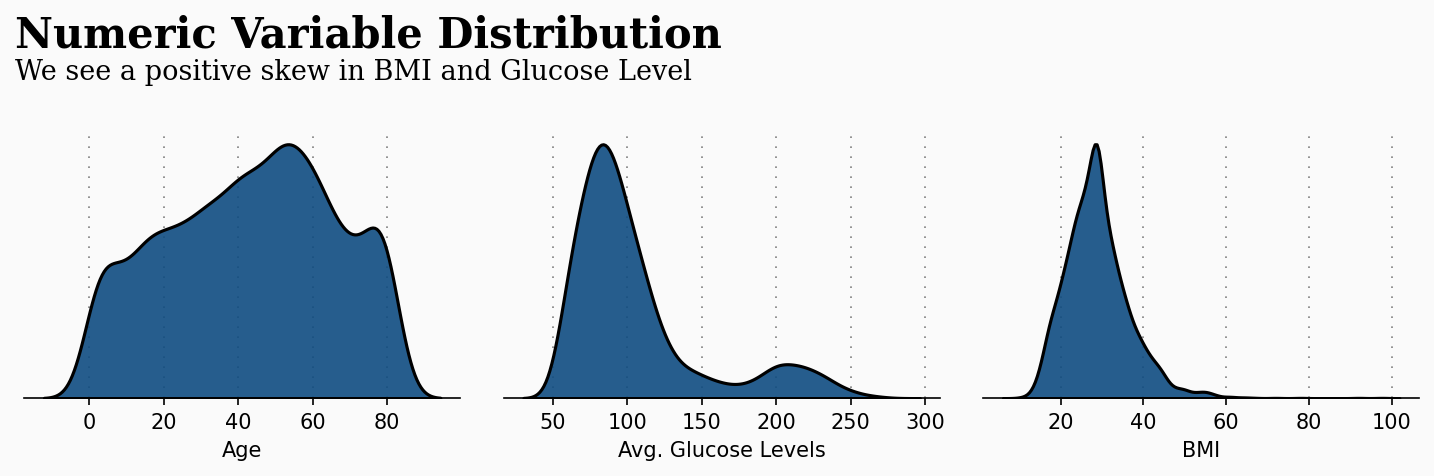

In [ ]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

So we've gained some understanding on the distributiona of our numeric variables, but we can add more information to this plot.

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

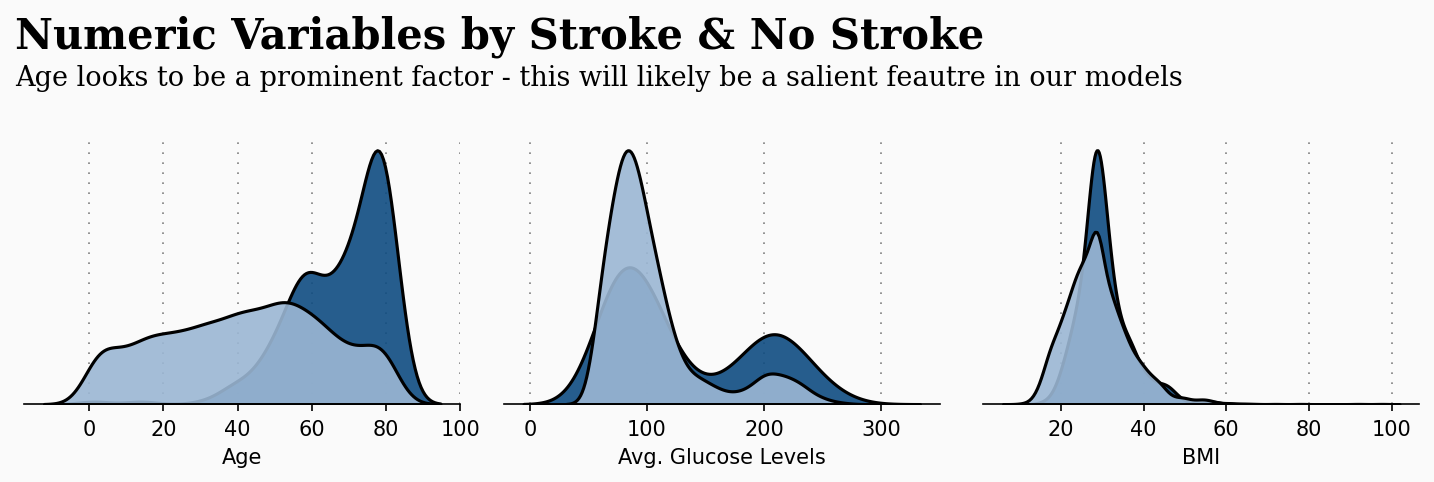

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

# Insight
Based on the above plots, it seems clear that **Age is a big factor** in stroke patients - the older you get the more at risk you are.

Though less obvious, there are also differences in Avg. Glucose Levels and BMI.

Let's explore those variables further...

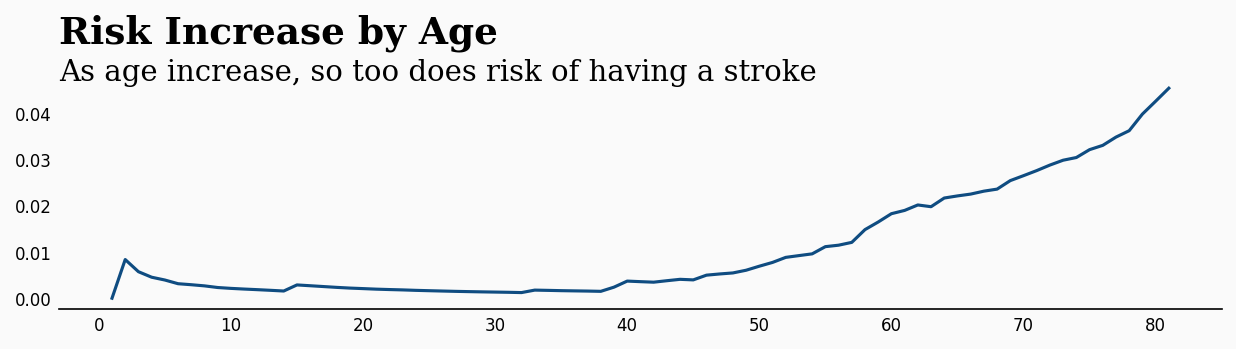

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()


This confirms what our intuitions told us. The older you get, the more at risk you get.

However, you may have notices the low risk values on the y-axis. This is because the dataset is highly imbalanced.

Only 249 strokes are in our dataset which totals 5000 - around 1 in 20.

# General Overview
We've assessed a few variables so far, and gained some powerful insights.

I'll now plot several variables in one place, so we can spot interesting trends or features.

I will split the data in to 'Stroke' and 'No-Stroke' so we can see if these two populations differ in any meaningful way.

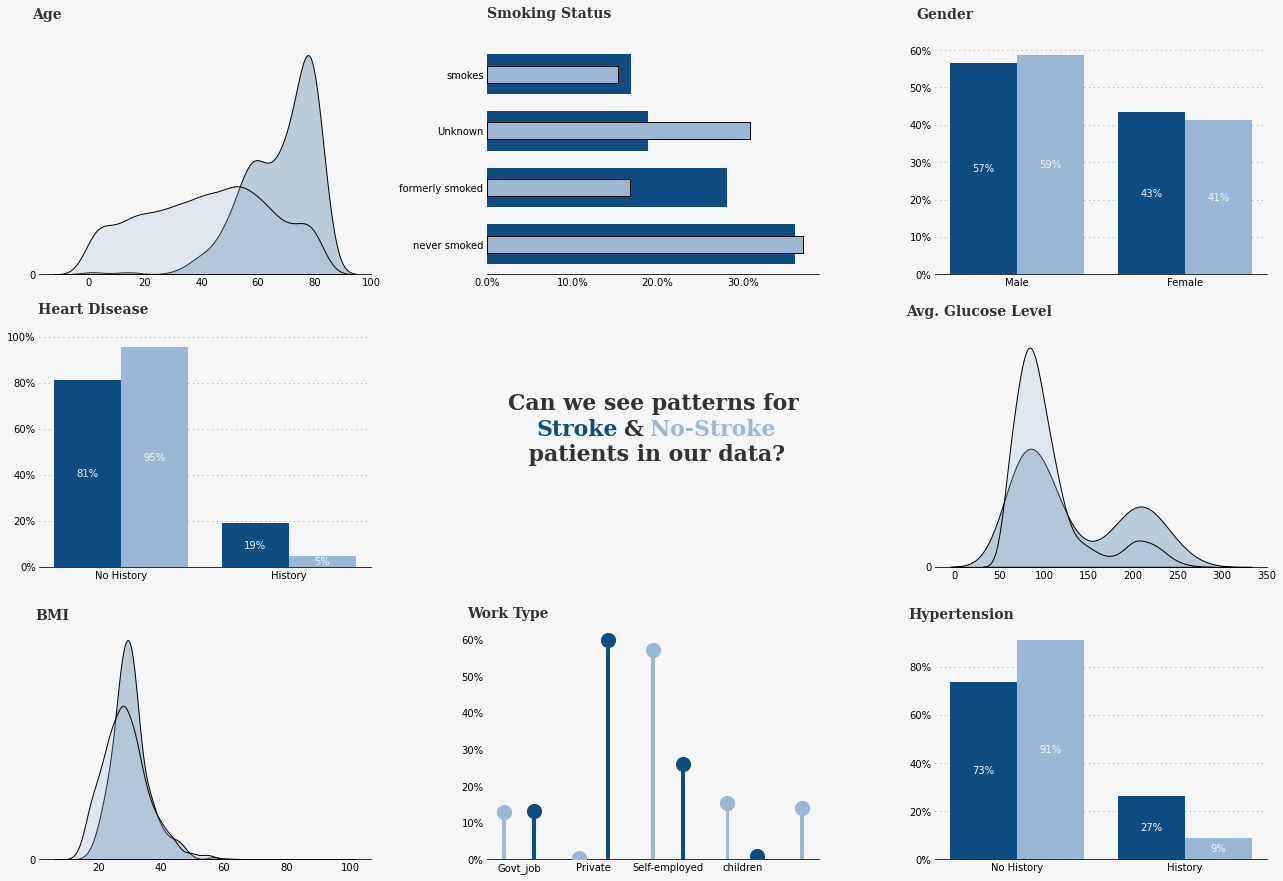

also has shown earlier we used SMOTE to fix imbalances in our dataset

# Question 2: Classification

**A**. in both modeling methods i used 10-fold cross validation, in this technique we divide the dataset into 10 groups and run the algorithm 10 times, in which everytime 1 group acts as the Test set and the others as the Training set.

from the methods I have mentioned the 2 best performing ones were random forest and linear regression.
random foreset is stable against overfitting

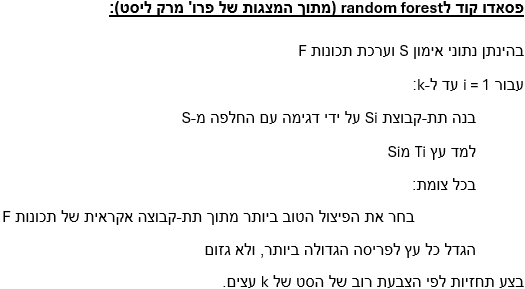



```
# This is formatted as code
```

Pseudocode for Linear Regression:

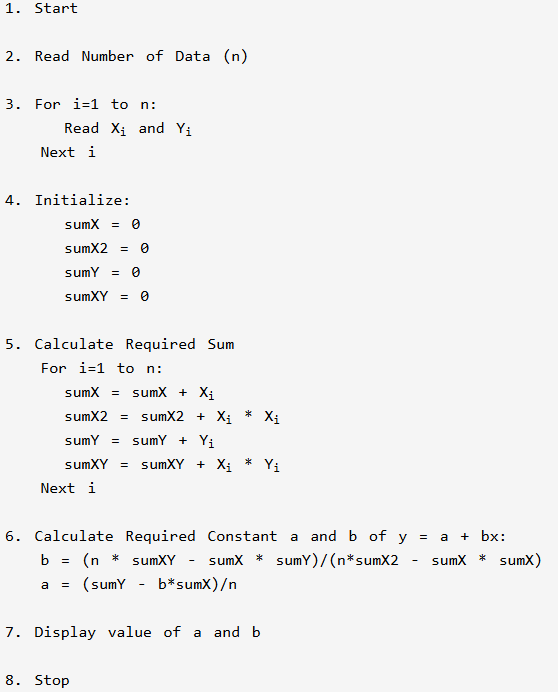

**C**. Modeling Results

In [ ]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9410298731274798
Logistic Regression mean : 0.8230120459005322


Random Forest performed the best.

Now let's try it on the unseen negative data

In [ ]:
rf_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

rf_pred   =rf_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('LR mean :',logreg_f1)

Mean f1 scores:
RF mean : 0.17131474103585656
LR mean : 0.1958955223880597


In [ ]:
print(classification_report(y_test,rf_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3404
           1       0.13      0.25      0.17       173

    accuracy                           0.88      3577
   macro avg       0.55      0.58      0.55      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8837014257757898


Good accuracy, poor recall

In [ ]:
# Pretty good accuracy, but poor recall!
# Unscaled and not upsampled negative

from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

rfc = RandomForestClassifier()

In [ ]:
# Let's use those params now

rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train_resh,y_train_resh)

rfc_tuned_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3404
           1       0.13      0.24      0.17       173

    accuracy                           0.89      3577
   macro avg       0.55      0.58      0.55      3577
weighted avg       0.92      0.89      0.90      3577

Accuracy Score:  0.885099245177523
F1 Score:  0.1696969696969697


**What about Logistic Regression?**
Logistic Regression had the highest f1 score above, so perhaps we can tune that for better results.



In [ ]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

log_param_grid = {'penalty': penalty,
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      3404
           1       0.12      0.61      0.19       173

    accuracy                           0.76      3577
   macro avg       0.55      0.69      0.53      3577
weighted avg       0.93      0.76      0.82      3577

Accuracy Score:  0.7567794240984065
F1 Score:  0.19444444444444445


So the hyper-parameter tuning has helped the Logisitc Regression model. It's recall score is much better than Random Forest's - even if the overall acuracy is down.

However, we can maniupulate the threshold that our model uses to classify stroke vs no-stroke.

Let's try that...

In [ ]:
#source code: https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
# modified

from sklearn.preprocessing import binarize

for i in range(1,6):

    cm1=0
    y_pred1 = logreg_pipeline.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, threshold=i/10) # Changed line: Pass threshold as a keyword argument
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'F1 score: ', (f1_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[1392 2012]
 [  11  162]] 

 with 1554 correct predictions,  

 2012 Type I errors( False Positives),  

 11 Type II errors( False Negatives),  

 Accuracy score:  0.4344422700587084 

 F1 score:  0.13804857264593098 

 Sensitivity:  0.9364161849710982 

 Specificity:  0.408930669800235 



With 0.2 threshold the Confusion Matrix is  

 [[1853 1551]
 [  17  156]] 

 with 2009 correct predictions,  

 1551 Type I errors( False Positives),  

 17 Type II errors( False Negatives),  

 Accuracy score:  0.5616438356164384 

 F1 score:  0.16595744680851063 

 Sensitivity:  0.9017341040462428 

 Specificity:  0.5443595769682726 



With 0.3 threshold the Confusion Matrix is  

 [[2141 1263]
 [  32  141]] 

 with 2282 correct predictions,  

 1263 Type I errors( False Positives),  

 32 Type II errors( False Negatives),  

 Accuracy score:  0.6379647749510763 

 F1 score:  0.17882054533925174 

 Sensitivity:  0.815028901734104 

 Specificity:  0.

by manipulating the threshold, we can catch more strokes.

However,needs to be careful with this approach. We could just change the threshold such that every patient is predicted to have a stroke so as not to miss any - but this helps no one.

F1 score is a decent starting point for this as it is the weighted average of several metrics.

Here's a chart showing what I mean

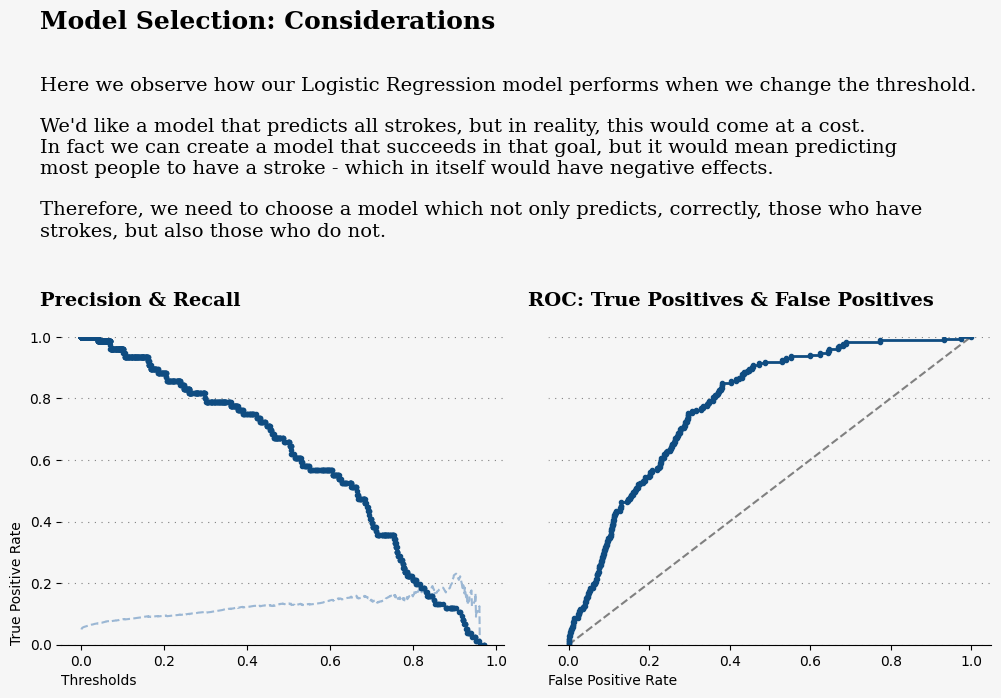

In [ ]:
# source code: https://www.kaggle.com/ilyapozdnyakov/rain-in-australia-precision-recall-curves-viz
# heeavily modified plotting

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



# Plots

fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2, wspace=0.1,hspace=0)
ax = gs.subplots()

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color)
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')
ax[0].plot(thresholds, recalls[:-1], '.', linewidth=1,label='Recall',color='#0f4c81')
ax[0].set_ylabel('True Positive Rate',loc='bottom')
ax[0].set_xlabel('Thresholds',loc='left')
#plt.legend(loc='center left')
ax[0].set_ylim([0,1])


# plot the roc curve for the model
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='gray')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,color='#0f4c81')
ax[1].set_xlabel('False Positive Rate',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])

for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)


ax[0].text(-0.1,2,'Model Selection: Considerations',fontsize=18,fontfamily='serif',fontweight='bold')
ax[0].text(-0.1,1.26,
'''
Here we observe how our Logistic Regression model performs when we change the threshold.

We'd like a model that predicts all strokes, but in reality, this would come at a cost.
In fact we can create a model that succeeds in that goal, but it would mean predicting
most people to have a stroke - which in itself would have negative effects.

Therefore, we need to choose a model which not only predicts, correctly, those who have
strokes, but also those who do not.
''',fontsize=14,fontfamily='serif')


ax[0].text(-0.1,1.1,'Precision & Recall',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].text(-0.1,1.1,'ROC: True Positives & False Positives',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()

# Final results analyzing, conclusions and suggestions for improvement

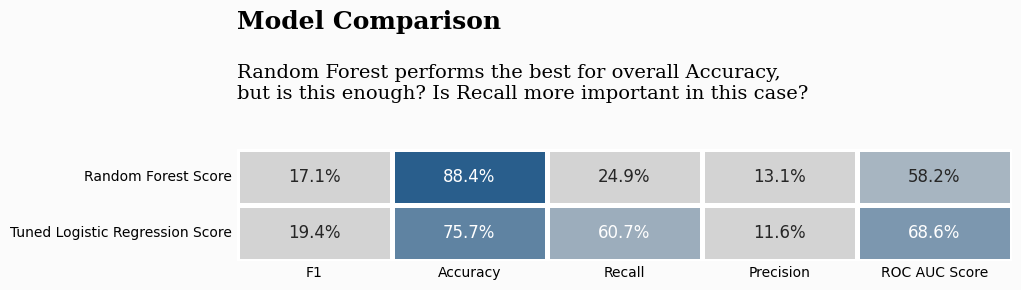

In [ ]:
# Make dataframes to plot

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)],
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)],
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

df_models = round(pd.concat([rf_df,lr_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Random Forest performs the best for overall Accuracy,\nbut is this enough? Is Recall more important in this case?',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()


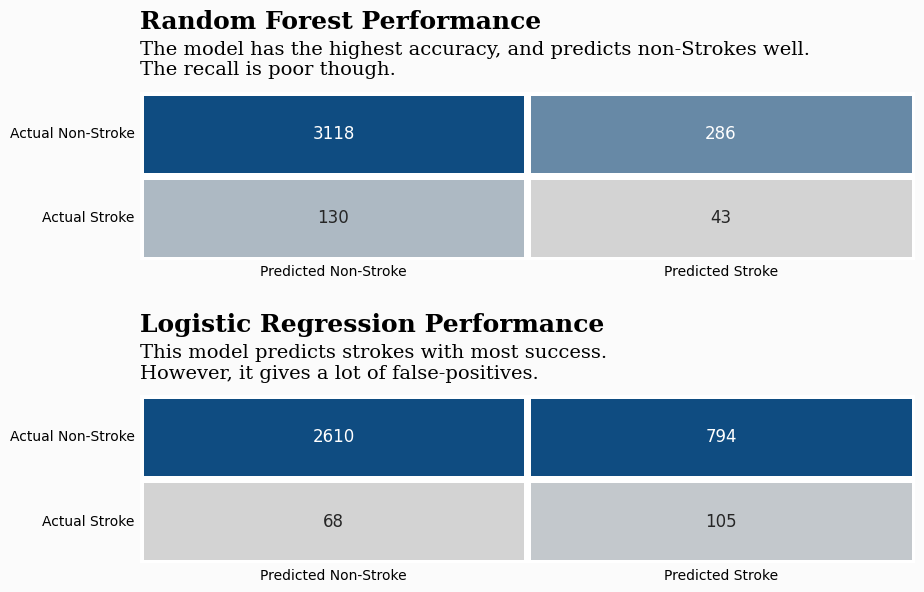

In [ ]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.2,'The model has the highest accuracy, and predicts non-Strokes well.\nThe recall is poor though.',fontsize=14,fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'This model predicts strokes with most success.\nHowever, it gives a lot of false-positives.',fontsize=14,fontfamily='serif')


plt.show()

So all of our models have quite a high accuracy, the highest being 95% (Tuned Random Forest).

I would assume it would be to offer medical advice / preventative treatment to those we predict will have a stroke, therefore, in the real-world, I would probably select the model with the highest recall.

as for selecting the best model for this problem i would choose Logistic regression,
It Has a decent accuracy, and the best recall. I feel that on balance it provides the best overall results.

**improvement suggestion:**
in this data set we have a big imbalance between people who had a stroke and people who didnt have a stroke, this case makes the prediction and classification harder, because of that it would increase the performance if more data about people who had strokes will be added into our data set

another suggestions would be to handle missing values in a more intelligent way, one that won't harm the correctness and legality of the data,
for example to run a prediction algorithm according the the different features assuming the features are related, or using the help of a profetional.